# Prepare omics data from graphnn

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns

In [2]:
rawdata_dir = '../data/raw/'
processed_dir = '../data/processed/'

Datasets needed to have in the rawdata_dir

In [3]:
#mutations  = 'CCLE_mutations.csv'
#expression = 'CCLE_expression.csv'
#cnv        = 'CCLE_gene_cn.csv'
#drugcomb_filtered   =  'drugcomb_filtered_KS.csv'
#meth       = 'CCLE_RRBS_TSS_CpG_clusters_20180614.txt'
drugcomb = 'summary_v_1_5.csv'
drugs = 'drugs.json'
sample_info = 'sample_info.csv'
raw_genes = 'df_rma_landm.tsv'

In [4]:
#read_mutations = pd.read_csv(os.path.join(rawdata_dir, mutations))
#read_expression = pd.read_csv(os.path.join(rawdata_dir, expression))
#read_cnv = pd.read_csv(os.path.join(rawdata_dir, cnv))
#read_meth = pd.read_csv(os.path.join(rawdata_dir, meth), sep = '\t')
df_drugcomb = pd.read_csv(os.path.join(rawdata_dir, drugcomb))
df_drugcomb_drugs = pd.read_json(os.path.join(rawdata_dir, drugs))
sample_info_DepMap = pd.read_csv(os.path.join(rawdata_dir, sample_info))
df_rma_landm = pd.read_csv(os.path.join(rawdata_dir, sample_info), sep="\t")

/var/folders/c7/mrt2qhgn0fv35v7r9wj3gj6w0000gn/T/ipykernel_15610/3008692021.py:1: DtypeWarning: Columns (3,19,22,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  read_mutations = pd.read_csv(os.path.join(rawdata_dir, mutations))
/var/folders/c7/mrt2qhgn0fv35v7r9wj3gj6w0000gn/T/ipykernel_15610/3008692021.py:4: DtypeWarning: Columns (280,491,502,567,636) have mixed types. Specify dtype option on import or set low_memory=False.
  read_meth = pd.read_csv(os.path.join(rawdata_dir, meth), sep = '\t')
/var/folders/c7/mrt2qhgn0fv35v7r9wj3gj6w0000gn/T/ipykernel_15610/3008692021.py:5: DtypeWarning: Columns (2,7,19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_drugcomb = pd.read_csv(os.path.join(rawdata_dir, drugcomb))


In [5]:
df_drugcomb.columns

Index(['block_id', 'drug_row', 'drug_col', 'cell_line_name', 'study_name',
       'tissue_name', 'conc_row_unit', 'conc_col_unit', 'ic50_row', 'ic50_col',
       'ri_row', 'ri_col', 'css_row', 'css_col', 'css_ri', 'S_sum', 'S_mean',
       'S_max', 'synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss',
       'drug_row_clinical_phase', 'drug_col_clinical_phase',
       'drug_row_target_name', 'drug_col_target_name'],
      dtype='object')

In [6]:
# Number of unique cell lines in the DrugComb DB dataset:
print('Number of unique cell lines in the DrugComb DB dataset:',len(df_drugcomb['cell_line_name'].unique()))


Number of unique cell lines in the DrugComb DB dataset: 1995


In [7]:
sample_info_DepMap = sample_info_DepMap[['DepMap_ID', 'cell_line_name', 'CCLE_Name']]


In [8]:
dict_cclename = dict(zip(sample_info_DepMap['CCLE_Name'], sample_info_DepMap['DepMap_ID']))
dict_cclename

{'SLR21_KIDNEY': 'ACH-000016',
 'MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 'ACH-000032',
 'NCIH1819_LUNG': 'ACH-000033',
 'HS895T_FIBROBLAST': 'ACH-000043',
 'HEKTE_KIDNEY': 'ACH-000049',
 'TE617T_SOFT_TISSUE': 'ACH-000051',
 'SALE_LUNG': 'ACH-000064',
 'REC1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 'ACH-000068',
 'HS706T_BONE': 'ACH-000071',
 'NCO2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 'ACH-000076',
 'MJ_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 'ACH-000077',
 'TE125T_FIBROBLAST': 'ACH-000079',
 'MUTZ3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 'ACH-000084',
 'NCIH684_LARGE_INTESTINE': 'ACH-000089',
 'PANC0504_PANCREAS': 'ACH-000093',
 'NCCSTCK140_STOMACH': 'ACH-000110',
 'HS863T_FIBROBLAST': 'ACH-000119',
 'SUPT11_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 'ACH-000122',
 'TO175T_FIBROBLAST': 'ACH-000125',
 'NALM19_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 'ACH-000130',
 'PFEIFFER_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 'ACH-000140',
 'HS888T_FIBROBLAST': 'ACH-000154',
 'OCILY3_HAEMATOPOIETIC_AND_LYMPHOID_TISS

In [9]:
dict_cellosaurus = dict(zip(sample_info_DepMap['cell_line_name'], sample_info_DepMap['DepMap_ID']))
dict_cellosaurus

{'SLR 21': 'ACH-000016',
 'MHH-CALL-3': 'ACH-000032',
 'NCI-H1819': 'ACH-000033',
 'Hs 895.T': 'ACH-000043',
 'HEK TE': 'ACH-000049',
 'TE 617.T': 'ACH-000051',
 'SALE': 'ACH-000064',
 'REC-1': 'ACH-000068',
 nan: 'ACH-002260',
 'NCO2': 'ACH-000076',
 'MJ': 'ACH-000077',
 'TE 125.T': 'ACH-000079',
 'NCI-H684': 'ACH-000089',
 'Panc 05.04': 'ACH-000093',
 'NCC-StC-K140': 'ACH-000110',
 'Hs 863.T': 'ACH-000119',
 'SUP-T11': 'ACH-000122',
 'TO 175.T': 'ACH-000125',
 'NALM-19': 'ACH-000130',
 'Pfeiffer': 'ACH-000140',
 'HS888T': 'ACH-000154',
 'OCI-LY3': 'ACH-000158',
 'Kasumi-6': 'ACH-000166',
 'PrEC LH': 'ACH-000170',
 'TM-87': 'ACH-000172',
 'JHUEM-3': 'ACH-000173',
 'NCI-H1618': 'ACH-000179',
 'Hs 839.T': 'ACH-000180',
 'Hs 934.T': 'ACH-000194',
 'PK-59': 'ACH-000205',
 'JH-EsoAd1': 'ACH-000216',
 'Mino': 'ACH-000220',
 'Hs 742.T': 'ACH-000230',
 'HuG1-N': 'ACH-000239',
 'JK-1': 'ACH-000241',
 'Toledo': 'ACH-000285',
 'BT-549': 'ACH-000288',
 'NCI-H889': 'ACH-000297',
 'KMRC-3': 'ACH-00

In [10]:
#dict_cellosaurus = dict(zip(cell_ids[0], cell_ids[1]))
#dict_cellosaurus

In [11]:
df_drugcomb

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name
0,518700,KIN001-055,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,0.881484,0.0,...,-1.3835,-2.767,0.0,0.0,0.0,0.0,0,0,\N,\N
1,521155,56990-57-9,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,0.135146,0.0,...,1.6760,0.000,0.0,0.0,0.0,0.0,0,0,\N,\N
2,521217,AR-42,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,2.383739,0.0,...,1.3250,0.000,0.0,0.0,0.0,0.0,1,0,Histone deacetylase,\N
3,527158,QL-X-138,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,10.240000,0.0,...,2.3020,0.000,0.0,0.0,0.0,0.0,0,0,\N,\N
4,527253,Belinostat,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,19.134169,0.0,...,3.1075,0.000,0.0,0.0,0.0,0.0,4,0,Histone deacetylase; Histone deacetylase 1; Hi...,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432346,697645,Tanespimycin,NaN,SW962,GDSC1,vulva,uM,NaN,0.009633,0.0,...,26.9000,0.000,0.0,0.0,0.0,0.0,3,0,Heat shock protein HSP 90-alpha; Heat shock pr...,\N
1432347,701108,azanide; dichloroplatinum(2+),NaN,SW962,GDSC1,vulva,uM,NaN,0.352063,0.0,...,4.2630,0.000,0.0,0.0,0.0,0.0,0,0,\N,\N
1432348,701796,rTRAIL,NaN,SW962,GDSC1,vulva,uM,NaN,0.004242,0.0,...,-5.0560,-10.112,0.0,0.0,0.0,0.0,0,0,\N,\N
1432349,702524,Nilotinib,NaN,SW962,GDSC1,vulva,uM,NaN,0.048311,0.0,...,-9.3305,-18.661,0.0,0.0,0.0,0.0,4,0,Carbonic anhydrase I; Carbonic anhydrase II; C...,\N


In [12]:
# Number of studies in the dataset from DrugComb 
len(df_drugcomb.study_name.value_counts())

34

In [13]:
print('The number of cells with cellosaurus annotation is:',
      len(set(df_drugcomb['cell_line_name']).intersection(set(dict_cellosaurus.keys()))))

The number of cells with cellosaurus annotation is: 1009


In [14]:
dict_smiles = dict(zip(df_drugcomb_drugs.dname, df_drugcomb_drugs.smiles))
dict_smiles

{'NULL': 'NULL',
 '5-Fluorouracil': 'C1=C(C(=O)NC(=O)N1)F',
 'Veliparib': 'CC1(CCCN1)C2=NC3=C(C=CC=C3N2)C(=O)N',
 'MK-1775': 'CC(C)(C1=NC(=CC=C1)N2C3=NC(=NC=C3C(=O)N2CC=C)NC4=CC=C(C=C4)N5CCN(CC5)C)O',
 '915019-65-7': 'CC(C)(C#N)C1=CC=C(C=C1)N2C3=C4C=C(C=CC4=NC=C3N(C2=O)C)C5=CC6=CC=CC=C6N=C5',
 'Bortezomib': 'B(C(CC(C)C)NC(=O)C(CC1=CC=CC=C1)NC(=O)C2=NC=CN=C2)(O)O',
 'Carboplatinum': 'C1CC(C1)(C(=O)O)C(=O)O.N.N.[Pt]',
 'cyclophosphamide': 'C1CNP(=O)(OC1)N(CCCl)CCCl',
 'Dasatinib': 'CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=NC(=NC(=C3)N4CCN(CC4)CCO)C',
 'dexamethasone': 'CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O)C)O)F)C',
 'Dinaciclib': 'CCC1=C2N=C(C=C(N2N=C1)NCC3=C[N+](=CC=C3)[O-])N4CCCCC4CCO',
 'doxorubicin': 'CC1C(C(CC(O1)OC2CC(CC3=C(C4=C(C(=C23)O)C(=O)C5=C(C4=O)C=CC=C5OC)O)(C(=O)CO)O)N)O',
 'Erlotinib': 'COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC',
 'etoposide': 'CC1OCC2C(O1)C(C(C(O2)OC3C4COC(=O)C4C(C5=CC6=C(C=C35)OCO6)C7=CC(=C(C(=C7)OC)O)OC)O)O',
 'gemcitabine': 'C1=CN(C(

### Annotate cells with Cosmic ids

Annotate cells with ACH IDs and filter out from the drugcomb dataframe those cells whose ACH ID is Nan

In [15]:
df_drugcomb["Cell_ID"] = [dict_cellosaurus[cell] if cell in dict_cellosaurus.keys() else float('nan') for cell in df_drugcomb['cell_line_name']]

In [16]:
df_drugcomb = df_drugcomb.replace({'\\N':float('nan')}).astype({"synergy_loewe": float}).dropna(subset=[
    'drug_row', 'drug_col', 'cell_line_name', 'synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss', 'Cell_ID'
])
#df_drugcomb = df_drugcomb.astype({"cosmicId": int})
df_drugcomb

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name,Cell_ID
19037,452434,lonidamine,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,7.604007e-02,4.496970,...,24.9095,0.409635,-11.702283,-1.252282,-1.212833,3,0,Beta-lactamase AmpC,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052
19038,452435,Ethyl bromopyruvate,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,4.000000e+00,3.605996,...,12.3940,-3.977257,-16.185120,-12.449563,-11.356646,0,0,NaN,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052
19039,452436,Tranilast (trans-),717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,1.437738e-02,2.802769,...,5.5935,0.117053,-16.588246,-4.052052,-1.243804,0,0,NaN,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052
19040,452437,Lenalidomide,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,7.631303e-09,3.926323,...,13.9555,2.606357,-10.877569,0.456392,3.936726,4,0,Cereblon/Aiolos; Cereblon/Ikaros; CRL4(CRBN) E...,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052
19041,452438,Pomalidomide,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,2.074997e+00,3.428020,...,20.9890,2.674166,-1.901326,3.045460,5.292969,4,0,Cereblon/Aiolos; Cereblon/Ikaros; CRL4(CRBN) E...,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430428,1205787,Saracatinib,Onalespib,UM-UC-3,ASTRAZENECA,urinary_tract,uM,uM,3.000000e+00,0.175791,...,37.0520,-1.800347,-1.031136,3.056158,0.645019,3,2,Tyrosine-protein kinase SRC; Tyrosine-protein ...,Heat shock protein HSP 90-beta; Heat shock pro...,ACH-000522
1430429,1205801,Saracatinib,AZD5582,UM-UC-3,ASTRAZENECA,urinary_tract,uM,uM,2.127672e+00,0.002522,...,15.2575,-1.952800,4.720322,5.976007,3.536210,3,0,Tyrosine-protein kinase SRC; Tyrosine-protein ...,Inhibitor of apoptosis protein 3; Baculoviral ...,ACH-000522
1430430,1205815,Saracatinib,Selumetinib,UM-UC-3,ASTRAZENECA,urinary_tract,uM,uM,1.140826e+00,0.266689,...,18.6495,3.245861,4.484276,7.830883,5.281020,3,3,Tyrosine-protein kinase SRC; Tyrosine-protein ...,Dual specificity mitogen-activated protein kin...,ACH-000522
1430431,1205829,Saracatinib,Olaparib,UM-UC-3,ASTRAZENECA,urinary_tract,uM,uM,1.337699e+00,3.000000,...,16.4990,-4.692480,0.339505,2.031605,2.399012,3,4,Tyrosine-protein kinase SRC; Tyrosine-protein ...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,ACH-000522


In [17]:
len(df_drugcomb['Cell_ID'].unique())

128

In [18]:
print('The number of cells with cellosaurus annotation is:',
      len(set(df_drugcomb['Cell_ID']).intersection(set(dict_cellosaurus.values()))))

The number of cells with cellosaurus annotation is: 128


In [19]:
df_drugcomb["drug_row_smiles"] = [dict_smiles[drug] for drug in df_drugcomb.drug_row]
df_drugcomb["drug_col_smiles"] = [dict_smiles[drug] for drug in df_drugcomb.drug_col]

In [20]:
null_smiles = df_drugcomb[(df_drugcomb.drug_row_smiles == "NULL") | (df_drugcomb.drug_col_smiles == "NULL")].index
df_drugcomb = df_drugcomb.drop(index=null_smiles)

In [21]:
df_drugcomb

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name,Cell_ID,drug_row_smiles,drug_col_smiles
19037,452434,lonidamine,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,7.604007e-02,4.496970,...,-11.702283,-1.252282,-1.212833,3,0,Beta-lactamase AmpC,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052,C1=CC=C2C(=C1)C(=NN2CC3=C(C=C(C=C3)Cl)Cl)C(=O)O,CN(C1=CC=CC=C1CNC2=NC(=NC=C2C(F)(F)F)NC3=CC4=C...
19038,452435,Ethyl bromopyruvate,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,4.000000e+00,3.605996,...,-16.185120,-12.449563,-11.356646,0,0,NaN,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052,CCOC(=O)C(=O)CBr,CN(C1=CC=CC=C1CNC2=NC(=NC=C2C(F)(F)F)NC3=CC4=C...
19039,452436,Tranilast (trans-),717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,1.437738e-02,2.802769,...,-16.588246,-4.052052,-1.243804,0,0,NaN,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052,COC1=C(C=C(C=C1)C=CC(=O)NC2=CC=CC=C2C(=O)O)OC,CN(C1=CC=CC=C1CNC2=NC(=NC=C2C(F)(F)F)NC3=CC4=C...
19040,452437,Lenalidomide,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,7.631303e-09,3.926323,...,-10.877569,0.456392,3.936726,4,0,Cereblon/Aiolos; Cereblon/Ikaros; CRL4(CRBN) E...,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052,C1CC(=O)NC(=O)C1N2CC3=C(C2=O)C=CC=C3N,CN(C1=CC=CC=C1CNC2=NC(=NC=C2C(F)(F)F)NC3=CC4=C...
19041,452438,Pomalidomide,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,2.074997e+00,3.428020,...,-1.901326,3.045460,5.292969,4,0,Cereblon/Aiolos; Cereblon/Ikaros; CRL4(CRBN) E...,Focal adhesion kinase 1; Protein tyrosine kina...,ACH-000052,C1CC(=O)NC(=O)C1N2C(=O)C3=C(C2=O)C(=CC=C3)N,CN(C1=CC=CC=C1CNC2=NC(=NC=C2C(F)(F)F)NC3=CC4=C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430428,1205787,Saracatinib,Onalespib,UM-UC-3,ASTRAZENECA,urinary_tract,uM,uM,3.000000e+00,0.175791,...,-1.031136,3.056158,0.645019,3,2,Tyrosine-protein kinase SRC; Tyrosine-protein ...,Heat shock protein HSP 90-beta; Heat shock pro...,ACH-000522,CN1CCN(CC1)CCOC2=CC(=C3C(=C2)N=CN=C3NC4=C(C=CC...,CC(C)C1=C(C=C(C(=C1)C(=O)N2CC3=C(C2)C=C(C=C3)C...
1430429,1205801,Saracatinib,AZD5582,UM-UC-3,ASTRAZENECA,urinary_tract,uM,uM,2.127672e+00,0.002522,...,4.720322,5.976007,3.536210,3,0,Tyrosine-protein kinase SRC; Tyrosine-protein ...,Inhibitor of apoptosis protein 3; Baculoviral ...,ACH-000522,CN1CCN(CC1)CCOC2=CC(=C3C(=C2)N=CN=C3NC4=C(C=CC...,CC(C(=O)NC(C1CCCCC1)C(=O)N2CCCC2C(=O)NC3C(CC4=...
1430430,1205815,Saracatinib,Selumetinib,UM-UC-3,ASTRAZENECA,urinary_tract,uM,uM,1.140826e+00,0.266689,...,4.484276,7.830883,5.281020,3,3,Tyrosine-protein kinase SRC; Tyrosine-protein ...,Dual specificity mitogen-activated protein kin...,ACH-000522,CN1CCN(CC1)CCOC2=CC(=C3C(=C2)N=CN=C3NC4=C(C=CC...,CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=...
1430431,1205829,Saracatinib,Olaparib,UM-UC-3,ASTRAZENECA,urinary_tract,uM,uM,1.337699e+00,3.000000,...,0.339505,2.031605,2.399012,3,4,Tyrosine-protein kinase SRC; Tyrosine-protein ...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,ACH-000522,CN1CCN(CC1)CCOC2=CC(=C3C(=C2)N=CN=C3NC4=C(C=CC...,C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC...


## Drop duplicates ?

## OMICs Data


### RNAseq expression data only with the L1000 Kyriakos

In [39]:
read_expression_filtered = read_expression.rename(columns = {'Unnamed: 0':'DepMap_ID'})
read_expression_filtered = read_expression_filtered.set_index(read_expression_filtered.columns[0])

genes = []
columns = read_expression_filtered.columns
for name in columns:
    namev2 = name.split(' ')[0]
    genes.append(namev2)
    
    
read_expression_filtered.columns = genes

In [41]:
df_rma_landm

,Unnamed: 0,GENE_SYMBOLS,GENE_title,DATA.906826,DATA.687983,DATA.910927,DATA.1240138,DATA.1240139,DATA.906792,DATA.910688,...,DATA.753584,DATA.907044,DATA.998184,DATA.908145,DATA.1659787,DATA.1298157,DATA.1480372,DATA.1298533,DATA.930299,DATA.905954.1
0,0,TSPAN6,tetraspanin 6 [Source:HGNC Symbol;Acc:11858],7.632023,7.548671,8.712338,7.797142,7.729268,7.074533,3.285198,...,7.105637,3.236503,3.038892,8.373223,6.932178,8.441628,8.422922,8.089255,3.112333,7.153127
1,3,SCYL3,SCY1-like 3 (S. cerevisiae) [Source:HGNC Symbo...,3.614794,4.066887,3.956230,4.063701,4.341500,4.270903,5.968168,...,3.696835,4.624013,4.348524,3.858121,3.947561,4.425849,3.550390,4.443337,4.266828,4.100493
2,19,BAD,BCL2-associated agonist of cell death [Source:...,7.458409,7.479327,7.419672,7.731137,6.998981,6.550210,6.354063,...,7.147962,6.478426,6.919537,6.801096,7.153122,7.234464,7.525257,6.066356,8.185968,4.967268
3,20,LAP3,leucine aminopeptidase 3 [Source:HGNC Symbol;A...,6.453926,6.742826,5.655691,5.259367,4.611395,6.930777,8.560707,...,5.383810,8.591164,6.208059,6.715130,6.530806,5.759933,7.810126,7.182077,5.663629,6.539451
4,28,SNX11,sorting nexin 11 [Source:HGNC Symbol;Acc:14975],4.767457,5.246301,4.645800,4.558836,5.456692,5.099542,7.574348,...,4.755084,6.761799,5.034195,4.958603,4.629068,4.982202,5.037259,4.611973,4.800284,4.967207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,17083,PLEKHM1,"pleckstrin homology domain containing, family ...",6.167946,5.271099,5.784561,7.587263,6.479184,5.700915,6.617353,...,6.714959,6.368537,8.252268,6.436644,6.436742,5.551436,5.634834,7.083564,5.776658,6.306988
904,17400,MIF,macrophage migration inhibitory factor (glycos...,11.893872,11.841300,12.272137,12.000410,11.867211,12.621575,11.825283,...,12.286071,12.572595,12.254136,12.588238,12.366026,12.153612,12.265099,11.919307,12.762295,12.985613
905,17444,PRAF2,"PRA1 domain family, member 2 [Source:HGNC Symb...",5.060852,6.515567,4.815762,4.544863,6.071288,4.777850,3.455981,...,5.314914,2.943601,4.723601,5.769965,5.070665,3.443244,3.293080,2.978125,5.125786,4.404205
906,17575,LYN,v-yes-1 Yamaguchi sarcoma viral related oncoge...,5.892532,4.580184,6.482469,7.094195,7.932918,7.333405,10.455397,...,4.914232,9.453552,3.218797,4.073831,6.355383,8.348965,7.579339,4.456322,5.857488,3.013612


In [48]:
read_expression_filtered_T = read_expression_filtered.T

In [57]:
landmark_new = df_rma_landm.merge(read_expression_filtered_T, left_on = 'GENE_SYMBOLS', right_on = read_expression_filtered_T.index)
landmark_new = landmark_new.filter(regex='^(?!DATA)', axis=1)
landmark_new_T = landmark_new.T

In [61]:
# set the first row as headers
new_header = landmark_new_T.iloc[1]
landmark_new_T = landmark_new_T[3:]
landmark_new_T.columns = new_header

# remove rows 0 an

In [64]:
len(set(landmark_new_T.index).intersection(set(df_drugcomb['Cell_ID'])))

119

In [67]:
landmark_new_T.to_csv(os.path.join(processed_dir, 'gene_expression_data_preprocessed_L1000.csv'))

## DO not run the part below for the baseline model 

### RNAseq xpression data


In [22]:
genes_unique  = read_expression.columns 
genes_unique  = pd.DataFrame(genes_unique)
gene_ids = genes_unique[0].str.replace(")","").str.replace("(","").str.split(' ', expand = True)[1]


/var/folders/c7/mrt2qhgn0fv35v7r9wj3gj6w0000gn/T/ipykernel_15610/3954837574.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gene_ids = genes_unique[0].str.replace(")","").str.replace("(","").str.split(' ', expand = True)[1]


In [23]:
genes_unique

,0
0,Unnamed: 0
1,TSPAN6 (7105)
2,TNMD (64102)
3,DPM1 (8813)
4,SCYL3 (57147)
...,...
19217,ELOA3B (728929)
19218,NPBWR1 (2831)
19219,ELOA3D (100506888)
19220,ELOA3 (162699)


In [23]:
read_expression_filtered = read_expression.rename(columns = {'Unnamed: 0':'DepMap_ID'})
read_expression_filtered = read_expression_filtered.set_index(read_expression_filtered.columns[0])
read_expression_filtered.columns =gene_ids.iloc[1:]


In [24]:
len(set(read_expression_filtered.index).intersection(set(df_drugcomb['Cell_ID'])))

119

##### Pivot Mutations data

In [25]:
read_mutations.head()

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
0,VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,C,...,False,0.0,NaN,damaging,34:213,NaN,NaN,NaN,34:221,NaN
1,AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,CTGGCGTGACGCCAT,...,False,3.0,NaN,other non-conserving,57:141,NaN,NaN,NaN,9:0,28:32
2,IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,G,...,False,0.0,NaN,silent,118:0,NaN,NaN,10:0,118:0,18:0
3,TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,-,...,False,0.0,NaN,damaging,NaN,NaN,NaN,6:28,NaN,NaN
4,ZSCAN20,7579,37,1,33954141,33954141,+,Missense_Mutation,SNP,T,...,False,0.0,NaN,other non-conserving,28:62,NaN,NaN,NaN,27:61,NaN


In [26]:
read_mutations_filtered = read_mutations[['Hugo_Symbol', 'Variant_Classification', 'DepMap_ID']]

In [27]:
read_mutations_filtered

,Hugo_Symbol,Variant_Classification,DepMap_ID
0,VPS13D,Nonsense_Mutation,ACH-000001
1,AADACL4,In_Frame_Del,ACH-000001
2,IFNLR1,Silent,ACH-000001
3,TMEM57,Frame_Shift_Ins,ACH-000001
4,ZSCAN20,Missense_Mutation,ACH-000001
...,...,...,...
1235461,GSN,Silent,ACH-002926
1235462,NOTCH1,Silent,ACH-002926
1235463,MAGEC1,Missense_Mutation,ACH-002926
1235464,MAGEA3,Missense_Mutation,ACH-002926


In [28]:
read_mutations_filtered['Variant_Classification'].unique()

array(['Nonsense_Mutation', 'In_Frame_Del', 'Silent', 'Frame_Shift_Ins',
       'Missense_Mutation', 'Splice_Site', 'Frame_Shift_Del',
       'De_novo_Start_OutOfFrame', 'Nonstop_Mutation', 'In_Frame_Ins',
       'Start_Codon_SNP', 'Start_Codon_Del', 'Stop_Codon_Ins',
       'Start_Codon_Ins', 'Stop_Codon_Del', 'Intron', 'IGR', "5'Flank",
       "3'UTR", "5'UTR"], dtype=object)

In [29]:
low_impact_mutations    = [ 'In_Frame_Del', 'Silent', 'Splice_Site',  'De_novo_Start_OutOfFrame',
       'Nonstop_Mutation', 'In_Frame_Ins','Start_Codon_SNP', 'Start_Codon_Del', 'Stop_Codon_Ins',
       'Start_Codon_Ins', 'Stop_Codon_Del', 'Intron', 'IGR', "5'Flank",
       "3'UTR", "5'UTR"]
medium_impact_mutations = ['Nonsense_Mutation', 'Missense_Mutation']
high_impact_mutations   = ['Frame_Shift_Ins','Frame_Shift_Del']

In [30]:
cell = []
gene = []
mutation = []

for cell_id in read_mutations_filtered['DepMap_ID'].unique():
    
    
    filtered_cell = read_mutations_filtered[read_mutations_filtered['DepMap_ID'] == cell_id]
    
    for gene_symbol in filtered_cell['Hugo_Symbol'].unique():
        
        gene.append(gene_symbol)
        filtered_gene = filtered_cell[filtered_cell['Hugo_Symbol'] == gene_symbol]
        cell.append(cell_id)
        for variant in filtered_gene['Variant_Classification']:
            if variant in high_impact_mutations:
                mutation_nr = 3

            elif variant in medium_impact_mutations:
                mutation_nr = 2

            else:
                mutation_nr = 1
            
            mutation.append(mutation_nr)

In [31]:
mutations = pd.DataFrame(list(zip(cell, gene, mutation)),
               columns =['Cell', 'Gene', 'Mutation'])

In [32]:
mutations_piv = pd.pivot_table(mutations, values='Mutation', index='Cell', columns='Gene', fill_value=0)

In [33]:
mutations_T = mutations_piv.T
mutations_T

Cell,ACH-000001,ACH-000002,ACH-000003,ACH-000004,ACH-000005,ACH-000006,ACH-000007,ACH-000008,ACH-000009,ACH-000011,...,ACH-002672,ACH-002680,ACH-002687,ACH-002693,ACH-002710,ACH-002785,ACH-002800,ACH-002834,ACH-002847,ACH-002926
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZYX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZZEF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
genes_unique['Hugo_symbol'] = genes_unique[0].str.replace(")","").str.replace("(","").str.split(' ', expand = True)[0]
genes_unique['ID_number'] = genes_unique[0].str.replace(")","").str.replace("(","").str.split(' ', expand = True)[1]
genes_unique

/var/folders/c7/mrt2qhgn0fv35v7r9wj3gj6w0000gn/T/ipykernel_8092/2690001346.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genes_unique['Hugo_symbol'] = genes_unique[0].str.replace(")","").str.replace("(","").str.split(' ', expand = True)[0]
/var/folders/c7/mrt2qhgn0fv35v7r9wj3gj6w0000gn/T/ipykernel_8092/2690001346.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  genes_unique['ID_number'] = genes_unique[0].str.replace(")","").str.replace("(","").str.split(' ', expand = True)[1]


,0,Hugo_symbol,ID_number
0,Unnamed: 0,Unnamed:,0
1,TSPAN6 (7105),TSPAN6,7105
2,TNMD (64102),TNMD,64102
3,DPM1 (8813),DPM1,8813
4,SCYL3 (57147),SCYL3,57147
...,...,...,...
19217,ELOA3B (728929),ELOA3B,728929
19218,NPBWR1 (2831),NPBWR1,2831
19219,ELOA3D (100506888),ELOA3D,100506888
19220,ELOA3 (162699),ELOA3,162699


In [35]:
mutations_T = mutations_T.merge(genes_unique, left_on = mutations_T.index, right_on = genes_unique['Hugo_symbol'], how = 'inner').set_index('ID_number')

In [36]:
mutations_T = mutations_T.iloc[:,1:-2].T

In [37]:
mutations_T

ID_number,1,29974,2,144568,127550,53947,51146,8086,65985,13,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
ACH-000001,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000002,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
ACH-000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
ACH-000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002785,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
ACH-002800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-002834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-002847,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Curate CNV data

In [38]:
read_cnv = read_cnv.rename(columns = {'Unnamed: 0':'DepMap_ID'})
genes_unique  = read_cnv.columns 
genes_unique  = pd.DataFrame(genes_unique)
gene_ids = genes_unique[0].str.replace(")","").str.replace("(","").str.split(' ', expand = True)[1]


/var/folders/c7/mrt2qhgn0fv35v7r9wj3gj6w0000gn/T/ipykernel_8092/2750683767.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gene_ids = genes_unique[0].str.replace(")","").str.replace("(","").str.split(' ', expand = True)[1]


In [39]:
read_cnv_filtered = read_cnv.rename(columns = {'Unnamed: 0':'DepMap_ID'})
read_cnv_filtered = read_cnv_filtered.set_index(read_cnv_filtered.columns[0])
read_cnv_filtered.columns =gene_ids.iloc[1:]
read_cnv_filtered

1,84771,653635,102466751,100302278,645520,79501,102723897,102465909,729759,101928626,...,474151,474149,442867,57054,57135,442868,474150,114758,9085,114760
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000267,1.149159,1.149159,1.149159,1.149159,1.149159,1.149159,1.149159,1.149159,1.149159,1.149159,...,5.421627e-01,5.421627e-01,5.421627e-01,5.421627e-01,5.421627e-01,5.421627e-01,5.421627e-01,5.421627e-01,5.421627e-01,5.421627e-01
ACH-001408,1.039446,1.039446,1.039446,1.039446,1.039446,1.039446,1.039446,1.039446,1.039446,1.039446,...,5.107920e-01,5.107920e-01,5.107920e-01,5.107920e-01,5.107920e-01,5.107920e-01,5.107920e-01,5.107920e-01,5.107920e-01,5.107920e-01
ACH-000617,0.762353,0.762353,0.762353,0.762353,0.762353,0.762353,0.762353,0.762353,0.762353,0.762353,...,1.032871e-08,1.032871e-08,1.032871e-08,1.032871e-08,1.032871e-08,1.032871e-08,1.032871e-08,1.032871e-08,1.032871e-08,1.032871e-08
ACH-002123,1.137564,1.137564,1.137564,1.137564,1.137564,1.137564,1.137564,1.137564,1.137564,1.137564,...,4.717688e-01,4.717688e-01,4.717688e-01,4.717688e-01,4.717688e-01,4.717688e-01,4.717688e-01,4.717688e-01,4.717688e-01,4.717688e-01
ACH-000519,1.005822,1.005822,1.005822,1.005822,1.005822,1.005822,1.005822,1.005822,1.005822,1.005822,...,8.638107e-10,8.638107e-10,8.638107e-10,8.638107e-10,8.638107e-10,8.638107e-10,8.638107e-10,8.638107e-10,8.638107e-10,8.638107e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001065,1.205677,1.205677,1.205677,1.205677,1.205677,1.205677,1.205677,1.205677,1.205677,1.205677,...,1.433003e-09,1.433003e-09,1.433003e-09,1.433003e-09,1.433003e-09,1.433003e-09,1.433003e-09,1.433003e-09,1.433003e-09,1.433003e-09
ACH-000341,1.057336,1.057336,1.057336,1.057336,1.057336,1.057336,1.057336,1.057336,1.057336,1.057336,...,5.835086e-01,5.835086e-01,5.835086e-01,5.835086e-01,5.835086e-01,5.835086e-01,5.835086e-01,5.835086e-01,5.835086e-01,5.835086e-01
ACH-000567,0.998783,0.998783,0.998783,0.998783,0.998783,0.998783,0.998783,0.998783,0.998783,0.998783,...,2.393341e-07,2.393341e-07,2.393341e-07,2.393341e-07,2.393341e-07,2.393341e-07,2.393341e-07,2.393341e-07,2.393341e-07,2.393341e-07


##### Curate Methylation data

In [40]:
read_meth = read_meth.rename(columns = {'Unnamed: 0':'DepMap_ID'})

In [41]:
read_meth_t = read_meth.T.reset_index()

In [42]:
read_meth_t.columns = read_meth_t.iloc[0]

In [43]:
read_meth_t["DepMap_ID"] = [dict_cclename[cell] if cell in dict_cclename.keys() else float('nan') for cell in read_meth_t['cluster_id']]


In [44]:
read_meth_t = read_meth_t.replace({'\\N':float('nan')}).dropna(subset=['DepMap_ID'])

KeyboardInterrupt: 

In [ ]:
read_meth_t

In [64]:
len(set(read_meth_t['DepMap_ID']).intersection(set(df_drugcomb['Cell_ID'])))

101

In [65]:
len(set(read_cnv['DepMap_ID']).intersection(set(df_drugcomb['Cell_ID'])).intersection(set(read_expression_filtered.index)).intersection(set(read_meth_t["DepMap_ID"])))

101

## Reduce datasets to the common number of cell IDs 

By 11.01.23 We will for the moment leave out the Methylation data

In [65]:
common_cells = pd.DataFrame(set(read_cnv['DepMap_ID']).intersection(set(df_drugcomb['Cell_ID'])).intersection(set(read_expression_filtered.index)).intersection(set(mutations["Cell"])), columns = ['DepMap_ID'])

KeyError: 'DepMap_ID'

In [46]:
len(common_cells)

119

In [47]:
common_genes1 = pd.DataFrame(set(mutations_T.T.index).intersection(set(read_expression_filtered.T.index)).intersection(set(read_cnv_filtered.T.index)))

In [48]:
common_genes2 = pd.DataFrame(set(read_expression_filtered.T.index).intersection(set(read_cnv_filtered.T.index)))

In [49]:
len(common_genes1)

17605

In [50]:
len(common_genes2)

19179

Common genes between expression and CNV data are 19179. Whilst with the mutations is 17605. These might be due because those genes don't have any mutation, so we will fill those genes with 0 values.

#### Filtered by common genes and cells Expression data

In [101]:
read_expression_filtered_cells = read_expression_filtered.merge(common_cells, left_on = read_expression_filtered.index, 
                                                                right_on = common_cells['DepMap_ID'], how = 'right')
read_expression_filtered_T = read_expression_filtered_cells.set_index('DepMap_ID').iloc[:,1:].T
read_expression_filtered_genes = read_expression_filtered_T.merge(common_genes2, left_on  = read_expression_filtered_T.index,
                                                                 right_on = common_genes2[0], how = 'right').drop_duplicates([0])
read_expression_filtered_genesCells = read_expression_filtered_genes.sort_values(by = [0], ascending=True).set_index([0]).iloc[:,1:].T

In [102]:
read_expression_filtered_genesCells = read_expression_filtered_genesCells.T.reset_index().rename(columns = {0:'Gene_ID'})
read_expression_filtered_genesCells

,Gene_ID,ACH-000277,ACH-000837,ACH-000930,ACH-000615,ACH-000090,ACH-000147,ACH-000849,ACH-000785,ACH-001190,...,ACH-000551,ACH-000720,ACH-001196,ACH-000376,ACH-000267,ACH-000680,ACH-000481,ACH-000856,ACH-000730,ACH-000530
0,1,5.146492,2.981853,4.052242,4.822220,1.263034,4.516646,2.678072,0.847997,3.893362,...,4.624686,0.695994,2.010780,4.305971,4.175525,0.250962,0.704872,4.724105,4.174726,5.621759
1,10,0.124328,0.286881,0.000000,0.000000,0.042644,0.250962,0.163499,0.485427,0.111031,...,0.000000,0.137504,0.464668,0.250962,0.000000,1.807355,0.163499,0.070389,0.056584,0.000000
2,100,0.084064,3.481557,4.149747,2.639232,2.891419,1.726831,3.559492,4.827819,3.538538,...,2.899176,2.017922,5.140370,2.912650,2.147307,3.635754,2.780310,3.970854,3.975447,3.565597
3,1000,0.238787,2.881665,0.622930,3.273516,5.226123,0.056584,1.803227,0.042644,0.910733,...,0.189034,6.029232,0.014355,5.497932,0.356144,0.042644,4.279471,3.085765,0.411426,0.464668
4,10000,0.070389,4.249445,5.250583,4.321207,3.171527,0.111031,3.727920,0.150560,4.725196,...,0.536053,4.532317,3.763412,2.847997,4.167519,0.097611,1.739848,0.855990,3.790772,4.123501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19174,9991,5.309613,4.902556,4.092546,3.760221,3.324811,4.984134,5.244887,5.058316,4.819668,...,5.868637,4.264536,5.034304,4.020591,5.584662,5.960697,4.760753,4.704872,4.377124,4.574707
19175,9992,0.695994,0.176323,0.613532,0.056584,0.189034,0.575312,0.978196,0.226509,0.000000,...,0.070389,0.263034,0.000000,0.250962,1.014355,0.014355,0.084064,0.286881,0.000000,0.263034
19176,9993,5.157044,5.458448,6.129077,5.028569,3.657640,4.785027,5.043957,4.965323,4.438293,...,5.864929,5.216455,4.590961,5.011675,4.121844,4.756490,4.759688,5.978424,4.508429,5.271276
19177,9994,3.590961,3.317594,2.744161,3.139142,2.260026,3.215679,4.186659,2.480265,3.584963,...,3.671293,3.467279,3.544733,3.157044,4.303781,3.187451,3.196922,4.286142,2.671293,4.100978


In [103]:
read_expression_filtered_genesCells.to_csv(os.path.join(processed_dir, 'gene_expression_data_preprocessed.csv'), index = None)

#### Filter by common genes and cells CNV data

In [98]:
read_cnv_filtered_cells = read_cnv_filtered.merge(common_cells, left_on = read_cnv_filtered.index, 
                                                                right_on = common_cells['DepMap_ID'], how = 'right')
read_cnv_filtered_T = read_cnv_filtered_cells.set_index('DepMap_ID').iloc[:,1:].T
read_cnv_filtered_genes = read_cnv_filtered_T.merge(common_genes2, left_on  = read_cnv_filtered_T.index,
                                                                 right_on = common_genes2[0], how = 'right').drop_duplicates([0])
read_cnv_filtered_genesCells = read_cnv_filtered_genes.sort_values(by = [0], ascending=True).set_index([0]).iloc[:,1:].T

In [99]:
read_cnv_filtered_genesCells = read_cnv_filtered_genesCells.T.reset_index().rename(columns = {0:'Gene_ID'})
read_cnv_filtered_genesCells

,Gene_ID,ACH-000277,ACH-000837,ACH-000930,ACH-000615,ACH-000090,ACH-000147,ACH-000849,ACH-000785,ACH-001190,...,ACH-000551,ACH-000720,ACH-001196,ACH-000376,ACH-000267,ACH-000680,ACH-000481,ACH-000856,ACH-000730,ACH-000530
0,1,1.031555,0.944715,0.756541,1.206992,1.211438,0.768499,1.341251,1.452116,0.905456,...,1.002602,0.925300,1.029293,1.096465,1.008494,0.741872,1.354908,0.980352,0.806532,1.173974
1,10,1.093802,0.546255,0.744336,0.835375,0.784642,0.832593,0.861512,0.640122,0.977407,...,0.982000,0.915472,1.469678,1.037913,0.574689,1.076897,1.076598,1.024159,0.747238,0.707131
2,100,1.787550,1.471560,2.021517,0.925605,1.251417,1.356372,1.037354,1.222511,1.282751,...,1.003322,1.122776,1.075256,1.021755,0.580835,1.416126,1.345187,1.042199,1.296084,0.834743
3,1000,0.685398,0.922892,1.081175,0.817158,1.130757,0.858228,0.818851,0.386752,0.974166,...,1.172393,0.808366,1.165846,1.016473,1.003177,0.810428,1.085301,1.038358,0.950280,1.001396
4,10000,1.108415,1.183689,1.529492,0.994248,1.320970,1.125498,1.235262,1.218143,1.092804,...,1.206254,1.197469,0.985526,1.004714,1.011931,1.047703,1.319866,1.014745,1.046404,1.044751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19174,9991,1.380481,0.925425,0.767892,0.898100,0.811080,1.381067,0.869019,0.918873,0.973519,...,0.997630,0.964079,1.302591,1.029486,1.013011,1.333506,0.840148,1.017062,1.110135,0.766850
19175,9992,1.042669,0.933492,1.191881,0.951660,1.238675,1.077861,1.309751,0.919539,0.970371,...,1.193927,0.921105,1.009351,1.230122,1.004917,0.791777,0.804547,0.993864,0.856674,0.972384
19176,9993,1.009506,1.258480,1.235767,1.325867,0.751190,0.769720,1.100519,1.088386,1.275583,...,2.066792,0.975385,1.157416,0.996319,1.036152,0.773341,1.055446,1.002974,1.136541,0.772943
19177,9994,1.129907,0.935139,0.779656,1.126231,0.790715,0.869332,1.453172,0.833466,0.977201,...,0.988313,0.886080,0.780440,0.991999,1.031005,0.971278,0.988014,1.020099,0.909038,0.994358


In [100]:
read_cnv_filtered_genesCells.to_csv(os.path.join(processed_dir, 'cnv_data_preprocessed.csv'), index = None)

#### Filter by common genes and cells mutation data

In [105]:
mutations_filtered_cells = mutations_T.merge(common_cells, left_on = mutations_T.index, 
                                                                right_on = common_cells['DepMap_ID'], how = 'right')
mutations_filtered_T = mutations_filtered_cells.set_index('DepMap_ID').iloc[:,1:].T
mutations_filtered_genes = mutations_filtered_T.merge(common_genes2, left_on  = mutations_filtered_T.index,
                                                                 right_on = common_genes2[0], how = 'right').drop_duplicates([0])
mutations_filtered_genesCells = mutations_filtered_genes.sort_values(by = [0], ascending=True).set_index([0]).iloc[:,1:].T

In [106]:
mutations_filtered_genesCells = mutations_filtered_genesCells.fillna(0)
mutations_filtered_genesCells

,1,10,100,1000,10000,10001,10002,10003,100033411,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
ACH-000277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000930,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
ACH-000615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
mutations_filtered_genesCells = mutations_filtered_genesCells.T.reset_index().rename(columns = {0:'Gene_ID'})
mutations_filtered_genesCells

,Gene_ID,ACH-000277,ACH-000837,ACH-000930,ACH-000615,ACH-000090,ACH-000147,ACH-000849,ACH-000785,ACH-001190,...,ACH-000551,ACH-000720,ACH-001196,ACH-000376,ACH-000267,ACH-000680,ACH-000481,ACH-000856,ACH-000730,ACH-000530
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,10000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19174,9991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19175,9992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19176,9993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19177,9994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
mutations_filtered_genesCells.to_csv(os.path.join(processed_dir, 'mutation_data_preprocessed.csv'), index = None)

#### Filter DrugComb DB

In [68]:
len(df_drugcomb)

298864

In [69]:
len(df_drugcomb['Cell_ID'].unique())

128

In [70]:
df_drugcomb_filtered_cells = df_drugcomb.merge(common_cells, left_on = df_drugcomb['Cell_ID'], 
                                                                right_on = common_cells['DepMap_ID'], how = 'right').iloc[:,1:]

df_drugcomb_filtered_cells

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name,Cell_ID,drug_row_smiles,drug_col_smiles,DepMap_ID
0,1187219,AZD5363,MK-2206,HCC1419,ASTRAZENECA,breast,uM,uM,0.293095,4.434052e-02,...,6.971932,2.519970,2,2,Rho-associated protein kinase 1; Rho-associate...,Serine/threonine-protein kinase AKT; Serine/th...,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...,ACH-000277
1,1187235,AZD5363,Perifosine,HCC1419,ASTRAZENECA,breast,uM,uM,0.234453,3.839034e-08,...,-0.439818,12.456200,2,3,Rho-associated protein kinase 1; Rho-associate...,NaN,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CCCCCCCCCCCCCCCCCCOP(=O)([O-])OC1CC[N+](CC1)(C)C,ACH-000277
2,1187304,AZD5363,5-azacytidine,HCC1419,ASTRAZENECA,breast,uM,uM,0.257603,3.246419e-01,...,-5.007640,3.287166,2,4,Rho-associated protein kinase 1; Rho-associate...,Serine/threonine-protein kinase mTOR; Bloom sy...,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,C1=NC(=NC(=O)N1C2C(C(C(O2)CO)O)O)N,ACH-000277
3,1187320,AZD5363,803712-79-0,HCC1419,ASTRAZENECA,breast,uM,uM,0.284417,1.170122e-01,...,4.876276,6.720925,2,2,Rho-associated protein kinase 1; Rho-associate...,NaN,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CC1=CC(=C(N1)C=C2C(=CC(=C3C=C4C=CC=CC4=N3)N2)O...,ACH-000277
4,1187336,AZD5363,Navitoclax,HCC1419,ASTRAZENECA,breast,uM,uM,0.282129,3.019878e-01,...,12.788118,20.048099,2,2,Rho-associated protein kinase 1; Rho-associate...,Apoptosis regulator Bcl-X; Bcl-xL/Bcl-2-like p...,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,ACH-000277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258741,1206753,503468-95-9,HG-14-10-04,DMS 114,ASTRAZENECA,lung,uM,uM,1.082188,3.000000e+00,...,10.646970,7.656814,0,0,DNA-dependent protein kinase; PI3-kinase p110-...,NaN,ACH-000530,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CN1CCN(CC1)C2CCN(CC2)C3=CC(=C(C=C3)NC4=NC=C(C(...,ACH-000530
258742,1206780,503468-95-9,NSC169534,DMS 114,ASTRAZENECA,lung,uM,uM,3.000000,2.751665e-02,...,13.771694,9.142595,0,4,DNA-dependent protein kinase; PI3-kinase p110-...,NaN,ACH-000530,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...,ACH-000530
258743,1206807,503468-95-9,33419-42-0,DMS 114,ASTRAZENECA,lung,uM,uM,3.000000,6.038796e-01,...,13.895436,8.296740,0,4,DNA-dependent protein kinase; PI3-kinase p110-...,NaN,ACH-000530,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CC1OCC2C(O1)C(C(C(O2)OC3C4COC(=O)C4C(C5=CC6=C(...,ACH-000530
258744,1206861,topotecan,AZ13453202,DMS 114,ASTRAZENECA,lung,uM,uM,0.100000,3.000000e+00,...,1.207848,-2.553007,4,NaN,DNA topoisomerase I; Hypoxia inducible factors...,NaN,ACH-000530,CCC1(C2=C(COC1=O)C(=O)N3CC4=C(C3=C2)N=C5C=CC(=...,CN(C)CC#Cc1ccc(OCCCc2sc(nc2C(=O)O)N3CCc4cccc(C...,ACH-000530


In [71]:
len(df_drugcomb_filtered_cells['Cell_ID'].unique())

119

### Filter duplicates

In [72]:
dup_to_drop = []

In [73]:
df_drugcomb_filter_dedup = df_drugcomb_filtered_cells.copy()
cols = ['drug_row', 'drug_col', "Cell_ID"]
df_drugcomb_filter_dedup[cols] = np.sort(df_drugcomb_filter_dedup[cols].values, axis=1)
dup = df_drugcomb_filter_dedup.duplicated(subset=cols, keep=False)

In [74]:
dup_score = df_drugcomb_filter_dedup[dup][cols]
dup_val = dup_score.duplicated(keep=False)
print(dup_val.value_counts())
dup_val_true = df_drugcomb_filter_dedup[dup][cols][dup_val] # same triplets and class
dup_val_false = df_drugcomb_filter_dedup[dup][cols][~dup_val] # same triplets, other class

True    37782
dtype: int64


In [75]:
dup_val_true.duplicated(keep="first").value_counts()

True     25210
False    12572
dtype: int64

In [76]:
dup_to_drop += list(dup_val_true[dup_val_true.duplicated(keep="first")].index)

In [77]:
dup2 = pd.concat([dup_val_false, dup_val_true[~dup_val_true.duplicated(keep="first")]], axis=0)
dup2_val = dup2.duplicated(subset=(cols), keep=False)#.value_counts()
dup_to_drop += list(dup2[dup2_val].sort_values(cols).index)

In [78]:
len(dup_to_drop)

25210

In [79]:
df_drugcomb_filter = df_drugcomb_filtered_cells.drop(index=dup_to_drop)
df_drugcomb_filter

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name,Cell_ID,drug_row_smiles,drug_col_smiles,DepMap_ID
0,1187219,AZD5363,MK-2206,HCC1419,ASTRAZENECA,breast,uM,uM,0.293095,4.434052e-02,...,6.971932,2.519970,2,2,Rho-associated protein kinase 1; Rho-associate...,Serine/threonine-protein kinase AKT; Serine/th...,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...,ACH-000277
1,1187235,AZD5363,Perifosine,HCC1419,ASTRAZENECA,breast,uM,uM,0.234453,3.839034e-08,...,-0.439818,12.456200,2,3,Rho-associated protein kinase 1; Rho-associate...,NaN,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CCCCCCCCCCCCCCCCCCOP(=O)([O-])OC1CC[N+](CC1)(C)C,ACH-000277
2,1187304,AZD5363,5-azacytidine,HCC1419,ASTRAZENECA,breast,uM,uM,0.257603,3.246419e-01,...,-5.007640,3.287166,2,4,Rho-associated protein kinase 1; Rho-associate...,Serine/threonine-protein kinase mTOR; Bloom sy...,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,C1=NC(=NC(=O)N1C2C(C(C(O2)CO)O)O)N,ACH-000277
3,1187320,AZD5363,803712-79-0,HCC1419,ASTRAZENECA,breast,uM,uM,0.284417,1.170122e-01,...,4.876276,6.720925,2,2,Rho-associated protein kinase 1; Rho-associate...,NaN,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CC1=CC(=C(N1)C=C2C(=CC(=C3C=C4C=CC=CC4=N3)N2)O...,ACH-000277
4,1187336,AZD5363,Navitoclax,HCC1419,ASTRAZENECA,breast,uM,uM,0.282129,3.019878e-01,...,12.788118,20.048099,2,2,Rho-associated protein kinase 1; Rho-associate...,Apoptosis regulator Bcl-X; Bcl-xL/Bcl-2-like p...,ACH-000277,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,ACH-000277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258741,1206753,503468-95-9,HG-14-10-04,DMS 114,ASTRAZENECA,lung,uM,uM,1.082188,3.000000e+00,...,10.646970,7.656814,0,0,DNA-dependent protein kinase; PI3-kinase p110-...,NaN,ACH-000530,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CN1CCN(CC1)C2CCN(CC2)C3=CC(=C(C=C3)NC4=NC=C(C(...,ACH-000530
258742,1206780,503468-95-9,NSC169534,DMS 114,ASTRAZENECA,lung,uM,uM,3.000000,2.751665e-02,...,13.771694,9.142595,0,4,DNA-dependent protein kinase; PI3-kinase p110-...,NaN,ACH-000530,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...,ACH-000530
258743,1206807,503468-95-9,33419-42-0,DMS 114,ASTRAZENECA,lung,uM,uM,3.000000,6.038796e-01,...,13.895436,8.296740,0,4,DNA-dependent protein kinase; PI3-kinase p110-...,NaN,ACH-000530,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CC1OCC2C(O1)C(C(C(O2)OC3C4COC(=O)C4C(C5=CC6=C(...,ACH-000530
258744,1206861,topotecan,AZ13453202,DMS 114,ASTRAZENECA,lung,uM,uM,0.100000,3.000000e+00,...,1.207848,-2.553007,4,NaN,DNA topoisomerase I; Hypoxia inducible factors...,NaN,ACH-000530,CCC1(C2=C(COC1=O)C(=O)N3CC4=C(C3=C2)N=C5C=CC(=...,CN(C)CC#Cc1ccc(OCCCc2sc(nc2C(=O)O)N3CCc4cccc(C...,ACH-000530


In [83]:
df_drugcomb_filter = df_drugcomb_filter.rename(columns = {'drug_row':'Drug1_ID', 'drug_col':'Drug2_ID',
                                     'drug_row_smiles':'Drug1', 'drug_col_smiles':'Drug2'})

In [84]:
df_drugcomb_filter = df_drugcomb_filter[['cell_line_name','Cell_ID','Drug1_ID', 'Drug2_ID',  'ic50_row', 'ic50_col',
       'ri_row', 'ri_col', 'css_row', 'css_col', 'css_ri', 'S_sum', 'S_mean',
       'S_max', 'synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss','Drug1','Drug2']]

In [85]:
df_drugcomb_filter

,cell_line_name,Cell_ID,Drug1_ID,Drug2_ID,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,Drug1,Drug2
0,HCC1419,ACH-000277,AZD5363,MK-2206,0.293095,4.434052e-02,14.945,40.436,42.234,61.899,52.0665,-3.3145,24.3760,11.6305,2.682771,3.267483,6.971932,2.519970,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...
1,HCC1419,ACH-000277,AZD5363,Perifosine,0.234453,3.839034e-08,11.384,-13.459,13.528,12.411,12.9695,15.0445,14.0070,1.5855,12.457827,-15.518840,-0.439818,12.456200,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CCCCCCCCCCCCCCCCCCOP(=O)([O-])OC1CC[N+](CC1)(C)C
2,HCC1419,ACH-000277,AZD5363,5-azacytidine,0.257603,3.246419e-01,15.858,-8.697,13.535,22.914,18.2245,11.0635,14.6440,2.3665,5.870657,-20.124636,-5.007640,3.287166,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,C1=NC(=NC(=O)N1C2C(C(C(O2)CO)O)O)N
3,HCC1419,ACH-000277,AZD5363,803712-79-0,0.284417,1.170122e-01,7.346,41.888,61.267,63.258,62.2625,13.0285,37.6455,20.3745,5.925285,-7.153205,4.876276,6.720925,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CC1=CC(=C(N1)C=C2C(=CC(=C3C=C4C=CC=CC4=N3)N2)O...
4,HCC1419,ACH-000277,AZD5363,Navitoclax,0.282129,3.019878e-01,7.060,1.376,41.825,41.708,41.7665,33.3305,37.5485,34.7065,13.331041,7.214639,12.788118,20.048099,C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258741,DMS 114,ACH-000530,503468-95-9,HG-14-10-04,1.082188,3.000000e+00,5.261,41.753,90.433,58.802,74.6175,27.6035,51.1105,32.8645,6.487383,2.211128,10.646970,7.656814,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CN1CCN(CC1)C2CCN(CC2)C3=CC(=C(C=C3)NC4=NC=C(C(...
258742,DMS 114,ACH-000530,503468-95-9,NSC169534,3.000000,2.751665e-02,11.199,27.671,61.071,71.177,66.1240,27.2540,46.6890,38.4530,7.666412,11.413245,13.771694,9.142595,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C...
258743,DMS 114,ACH-000530,503468-95-9,33419-42-0,3.000000,6.038796e-01,14.136,36.976,65.635,75.917,70.7760,19.6640,45.2200,33.8000,8.622407,11.454024,13.895436,8.296740,C1COCCN1C2=CC(=O)C3=C(O2)C(=CC=C3)C4=CC=CC5=C4...,CC1OCC2C(O1)C(C(C(O2)OC3C4COC(=O)C4C(C5=CC6=C(...
258744,DMS 114,ACH-000530,topotecan,AZ13453202,0.100000,3.000000e+00,23.109,7.749,28.545,92.023,60.2840,29.4260,44.8550,37.1750,-2.933191,-57.799673,1.207848,-2.553007,CCC1(C2=C(COC1=O)C(=O)N3CC4=C(C3=C2)N=C5C=CC(=...,CN(C)CC#Cc1ccc(OCCCc2sc(nc2C(=O)O)N3CCc4cccc(C...


In [87]:
df_drugcomb_filter.to_csv(os.path.join(processed_dir, 'drugcomb_filtered.csv'), index = None)

### Statistics

In [110]:
df_drugcomb_filter

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name,Cell_ID,drug_row_smiles,drug_col_smiles,DepMap_ID
0,1186511,MEDI3622,MK-2206,MFM-223,ASTRAZENECA,breast,uM,uM,50.108414,0.192438,...,7.976061,12.324084,NaN,2,NaN,Serine/threonine-protein kinase AKT; Serine/th...,ACH-001819,Antibody (MEDI3622),C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...,ACH-001819
1,1186542,MEDI3622,AZD5363,MFM-223,ASTRAZENECA,breast,uM,uM,50.157702,0.224273,...,9.271570,12.533781,NaN,2,NaN,Rho-associated protein kinase 1; Rho-associate...,ACH-001819,Antibody (MEDI3622),C1CN(CCC1(C(=O)NC(CCO)C2=CC=C(C=C2)Cl)N)C3=NC=...,ACH-001819
2,1186573,MEDI3622,AZD4320,MFM-223,ASTRAZENECA,breast,uM,uM,1.531877,0.351310,...,-3.355824,-2.198271,NaN,0,NaN,Apoptosis regulator Bcl-X,ACH-001819,Antibody (MEDI3622),CN(CCC(CSC1=CC=CC=C1)NC2=C(C=C(C=C2)S(=O)(=O)N...,ACH-001819
3,1186604,MEDI3622,AZD4547,MFM-223,ASTRAZENECA,breast,uM,uM,24.551545,0.010735,...,-8.751371,-8.369851,NaN,3,NaN,Fibroblast growth factor receptor 3; Fibroblas...,ACH-001819,Antibody (MEDI3622),CC1CN(CC(N1)C)C2=CC=C(C=C2)C(=O)NC3=NNC(=C3)CC...,ACH-001819
4,1186635,MEDI3622,Selumetinib,MFM-223,ASTRAZENECA,breast,uM,uM,1.246251,0.034114,...,-7.499770,-6.468704,NaN,3,NaN,Dual specificity mitogen-activated protein kin...,ACH-001819,Antibody (MEDI3622),CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=...,ACH-001819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258739,441678,Ruxolitinib,ADM hydrochloride,UO-31,ALMANAC,kidney,uM,uM,10.000000,2.979647,...,6.675112,3.124467,4,3,Tyrosine-protein kinase JAK1; Tyrosine-protein...,NaN,ACH-000428,C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3,CC1C(C(CC(O1)OC2CC(CC3=C(C4=C(C(=C23)O)C(=O)C5...,ACH-000428
258742,441699,Axitinib,ADM hydrochloride,UO-31,ALMANAC,kidney,uM,uM,0.083587,2.979647,...,1.699228,1.683233,4,3,Vascular endothelial growth factor receptor 2;...,NaN,ACH-000428,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...,CC1C(C(CC(O1)OC2CC(CC3=C(C4=C(C(=C23)O)C(=O)C5...,ACH-000428
258743,441703,Vismodegib,ADM hydrochloride,UO-31,ALMANAC,kidney,uM,uM,30.000000,2.979647,...,4.714624,0.131322,4,3,Sonic hedgehog protein; Smoothened homolog,NaN,ACH-000428,CS(=O)(=O)C1=CC(=C(C=C1)C(=O)NC2=CC(=C(C=C2)Cl...,CC1C(C(CC(O1)OC2CC(CC3=C(C4=C(C(=C23)O)C(=O)C5...,ACH-000428
258744,441704,Crizotinib,ADM hydrochloride,UO-31,ALMANAC,kidney,uM,uM,1.000000,2.979647,...,-0.964368,-2.836142,4,3,Hepatocyte growth factor receptor; Macrophage-...,NaN,ACH-000428,CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N...,CC1C(C(CC(O1)OC2CC(CC3=C(C4=C(C(=C23)O)C(=O)C5...,ACH-000428


In [142]:
#Select a score between: 'synergy_hsa', 'synergy_zip', 'synergy_bliss', 'synergy_loewe'
score = 'synergy_zip'

In [143]:
data_score_filtered = df_drugcomb_filter[['block_id', 'drug_row', 'study_name', 'drug_col', score, 'Cell_ID']].dropna(subset = [score])
print(len(data_score_filtered))

233536


In [144]:
print(len(data_score_filtered['Cell_ID'].unique()))

119


In [145]:
#Number of Drugs
drugs = pd.concat([data_score_filtered['drug_row'], data_score_filtered['drug_col']])

In [146]:
len(drugs.unique())

3116

In [147]:
len(data_score_filtered['drug_row'].unique())

3100

In [148]:
len(data_score_filtered['drug_col'].unique())

380

In [152]:
data_score_filtered.plot.hist(by=score, bins=10)

KeyboardInterrupt: 

<AxesSubplot:>

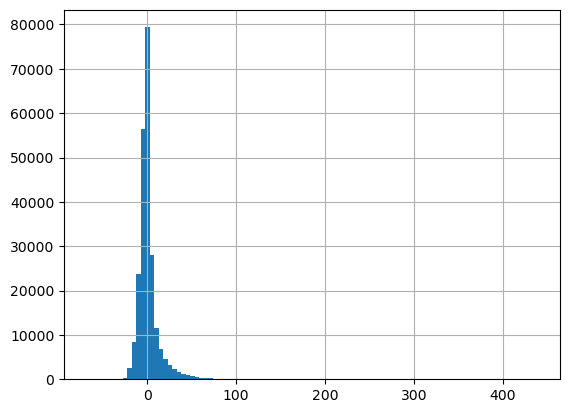

In [158]:
df_drugcomb_filter['synergy_zip'].hist(bins=100)

<AxesSubplot:>

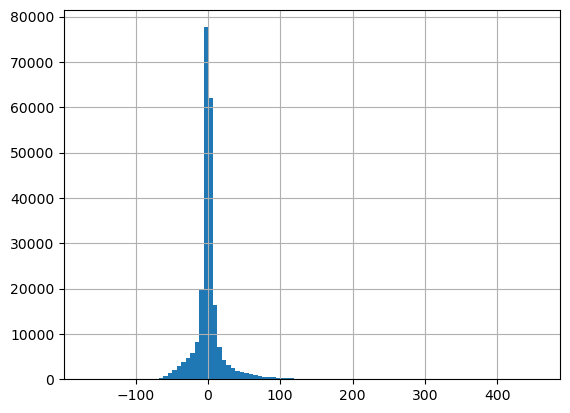

In [159]:
df_drugcomb_filter['synergy_bliss'].hist(bins=100)

<AxesSubplot:>

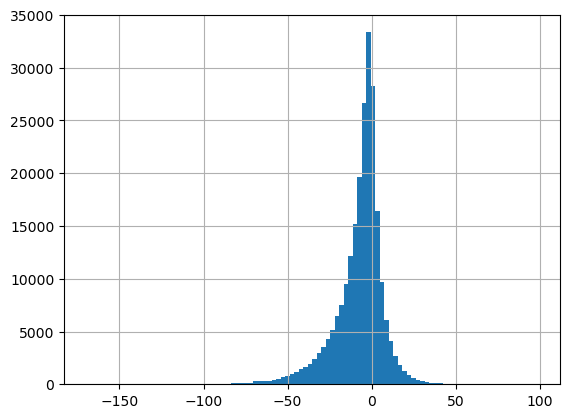

In [160]:
df_drugcomb_filter['synergy_loewe'].hist(bins=100)

<AxesSubplot:>

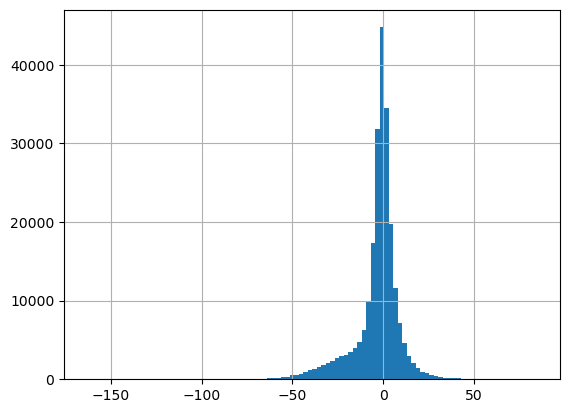

In [161]:
df_drugcomb_filter['synergy_hsa'].hist(bins=100)